# Imports

In [ ]:
import pandas as pd
import numpy as np
import os

from utils import print_evaluation_metrics, clean_database, \
    create_dataloaders, train_and_evaluate_pytorch_model, \
    analyze_correlations, perform_voting_feature_selection, log_metrics, plot_individual_metrics
from preprocess import preprocessing

pd.set_option('display.max_columns', None)

# Data cleaning and splitting

In [2]:
X_train, X_val, X_test, y_train, y_val, y_test, output_encoder = clean_database(os.path.join('data', 'datasets', '5G NIDD', 'Combined.csv'))

/Users/hemaali/Desktop/Master Degree Project/utils.py:25: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(db_path)


Original shape: (1215890, 52)
Shape after removing duplicates: (1215889, 52)


/Users/hemaali/Desktop/Master Degree Project/utils.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[numeric_cols] = X_train[numeric_cols].fillna(train_medians)
/Users/hemaali/Desktop/Master Degree Project/utils.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_val[numeric_cols] = X_val[numeric_cols].fillna(train_medians)
/Users/hemaali/Desktop/Master Degree Project/utils.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

<class 'pandas.core.frame.DataFrame'>
Index: 972711 entries, 528336 to 737081
Data columns (total 41 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  972711 non-null  float32
 1   Dur         972711 non-null  float64
 2   Mean        972711 non-null  float64
 3   Sum         972711 non-null  float64
 4   Min         972711 non-null  float64
 5   Max         972711 non-null  float64
 6   Proto       972711 non-null  float32
 7   sTos        972711 non-null  float64
 8   dTos        972711 non-null  float64
 9   sDSb        972711 non-null  float32
 10  dDSb        972711 non-null  float32
 11  sTtl        972711 non-null  float64
 12  dTtl        972711 non-null  float64
 13  Cause       972711 non-null  float32
 14  TotPkts     972711 non-null  float32
 15  SrcPkts     972711 non-null  float32
 16  DstPkts     972711 non-null  float32
 17  TotBytes    972711 non-null  float32
 18  SrcBytes    972711 non-null  float32
 19  Ds

/Users/hemaali/Desktop/Master Degree Project/utils.py:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[column] = X_train[column].astype('float32')
/Users/hemaali/Desktop/Master Degree Project/utils.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_val[column] = X_val[column].astype('float32')
/Users/hemaali/Desktop/Master Degree Project/utils.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

# Feature Selection

## Correlations

### Analyze correlation between featrues

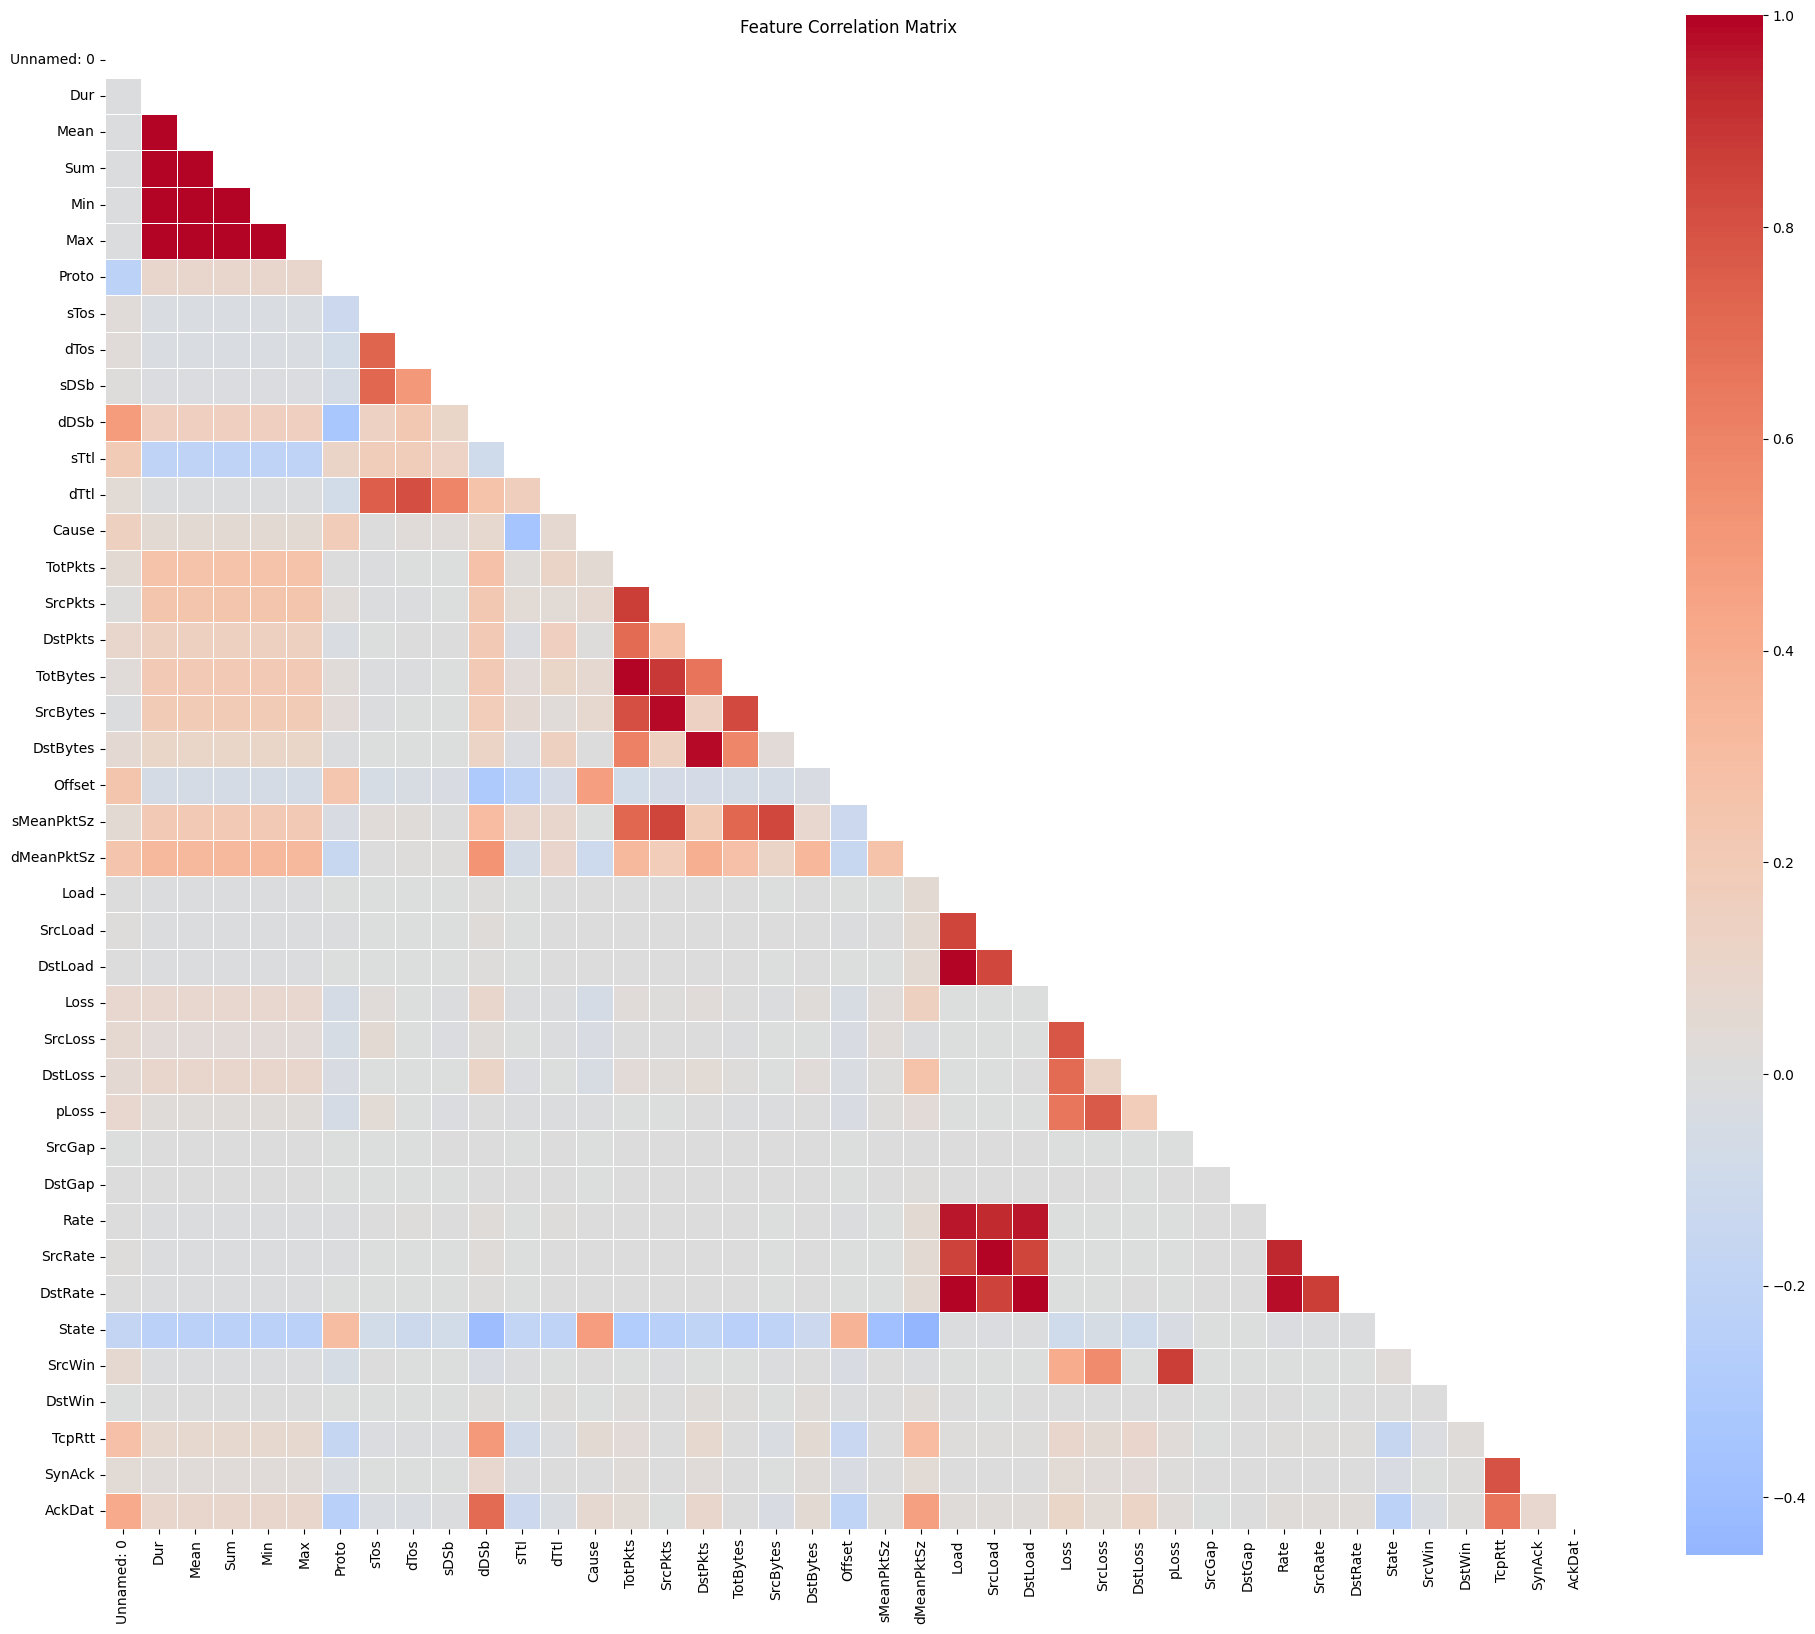


[Analysis] Features with correlation > 0.95:
  - Mean is correlated with ['Dur']
  - Sum is correlated with ['Dur', 'Mean']
  - Min is correlated with ['Dur', 'Mean', 'Sum']
  - Max is correlated with ['Dur', 'Mean', 'Sum', 'Min']
  - TotBytes is correlated with ['TotPkts']
  - SrcBytes is correlated with ['SrcPkts']
  - DstBytes is correlated with ['DstPkts']
  - DstLoad is correlated with ['Load']
  - Rate is correlated with ['Load', 'DstLoad']
  - SrcRate is correlated with ['SrcLoad']
  - DstRate is correlated with ['Load', 'DstLoad', 'Rate']


In [3]:
high_corr_features = analyze_correlations(X_train, threshold=0.95)

### Drop correlated features

In [4]:
X_train = X_train.drop(columns=high_corr_features)
X_val = X_val.drop(columns=high_corr_features)
X_test = X_test.drop(columns=high_corr_features)
print(f"Dropped {len(high_corr_features)} correlated features.")

Dropped 11 correlated features.


## Arguments

In [5]:
version = 'v1'
model_results= []
preprocessing_output_dir = os.path.join('data', 'figures', '5G NIDD', 'preprocessing')

## Compare the result of all methods


[Comparison] Using full training data (972711 samples) for feature selection.

Comparing Feature Selection Methods

--- Filter Method: pearson ---

[Filter] Starting PEARSON Feature Selection to select top 20 features...
[Filter] Completed in 0.14 seconds.
[Filter] Selected Features: ['Unnamed: 0', 'Dur', 'Proto', 'sTos', 'dDSb', 'sTtl', 'dTtl', 'Cause', 'TotPkts', 'SrcPkts', 'DstPkts', 'Offset', 'sMeanPktSz', 'dMeanPktSz', 'Loss', 'pLoss', 'State', 'SrcWin', 'TcpRtt', 'AckDat']
   -> Validation Accuracy: 0.9996

--- Filter Method: anova ---

[Filter] Starting ANOVA Feature Selection to select top 20 features...
[Filter] Completed in 0.26 seconds.
[Filter] Selected Features: ['Unnamed: 0', 'Dur', 'Proto', 'dDSb', 'sTtl', 'dTtl', 'Cause', 'TotPkts', 'SrcPkts', 'DstPkts', 'Offset', 'sMeanPktSz', 'dMeanPktSz', 'Loss', 'DstLoss', 'pLoss', 'State', 'SrcWin', 'TcpRtt', 'AckDat']
   -> Validation Accuracy: 0.9996

--- Filter Method: chi2 ---

[Filter] Starting CHI2 Feature Selection to selec

/opt/anaconda3/envs/pytorch_env/lib/python3.13/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/pytorch_env/lib/python3.13/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[Embedded] Completed in 3291.44 seconds.
[Embedded] Selected Features: ['Dur', 'Proto', 'sTos', 'dTos', 'sDSb', 'dDSb', 'sTtl', 'dTtl', 'Cause', 'SrcPkts', 'DstPkts', 'sMeanPktSz', 'dMeanPktSz', 'Loss', 'SrcLoss', 'DstLoss', 'pLoss', 'State', 'SynAck', 'AckDat']
   -> Validation Accuracy: 0.7161

--- Embedded Method: ridge ---

[Embedded] Starting RIDGE Feature Selection to select top 20 features...


/opt/anaconda3/envs/pytorch_env/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/pytorch_env/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

[Embedded] Completed in 28.66 seconds.
[Embedded] Selected Features: ['Unnamed: 0', 'Dur', 'Proto', 'sTos', 'dTos', 'sDSb', 'dDSb', 'sTtl', 'dTtl', 'TotPkts', 'SrcPkts', 'DstPkts', 'Offset', 'sMeanPktSz', 'dMeanPktSz', 'Load', 'SrcLoad', 'State', 'SrcWin', 'DstWin']
   -> Validation Accuracy: 0.9995

--- Embedded Method: elastic_net ---

[Embedded] Starting ELASTIC_NET Feature Selection to select top 20 features...


/opt/anaconda3/envs/pytorch_env/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/pytorch_env/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[Embedded] Completed in 212.18 seconds.
[Embedded] Selected Features: ['Unnamed: 0', 'Dur', 'Proto', 'sTos', 'dTos', 'sDSb', 'sTtl', 'dTtl', 'Cause', 'TotPkts', 'SrcPkts', 'DstPkts', 'Offset', 'sMeanPktSz', 'dMeanPktSz', 'Load', 'SrcLoad', 'State', 'SrcWin', 'DstWin']
   -> Validation Accuracy: 0.9996

--- Embedded Method: rf ---

[Embedded] Starting RF Feature Selection to select top 20 features...
[Embedded] Completed in 17.89 seconds.
[Embedded] Selected Features: ['Unnamed: 0', 'Dur', 'Proto', 'dDSb', 'sTtl', 'dTtl', 'Cause', 'SrcPkts', 'DstPkts', 'Offset', 'sMeanPktSz', 'dMeanPktSz', 'Load', 'SrcLoad', 'State', 'SrcWin', 'DstWin', 'TcpRtt', 'SynAck', 'AckDat']
   -> Validation Accuracy: 0.9995

--- Embedded Method: gradient_boosting ---

[Embedded] Starting GRADIENT_BOOSTING Feature Selection to select top 20 features...
[Embedded] Completed in 2245.85 seconds.
[Embedded] Selected Features: ['Unnamed: 0', 'Dur', 'Proto', 'sTtl', 'dTtl', 'Cause', 'SrcPkts', 'DstPkts', 'Offset', 'sM

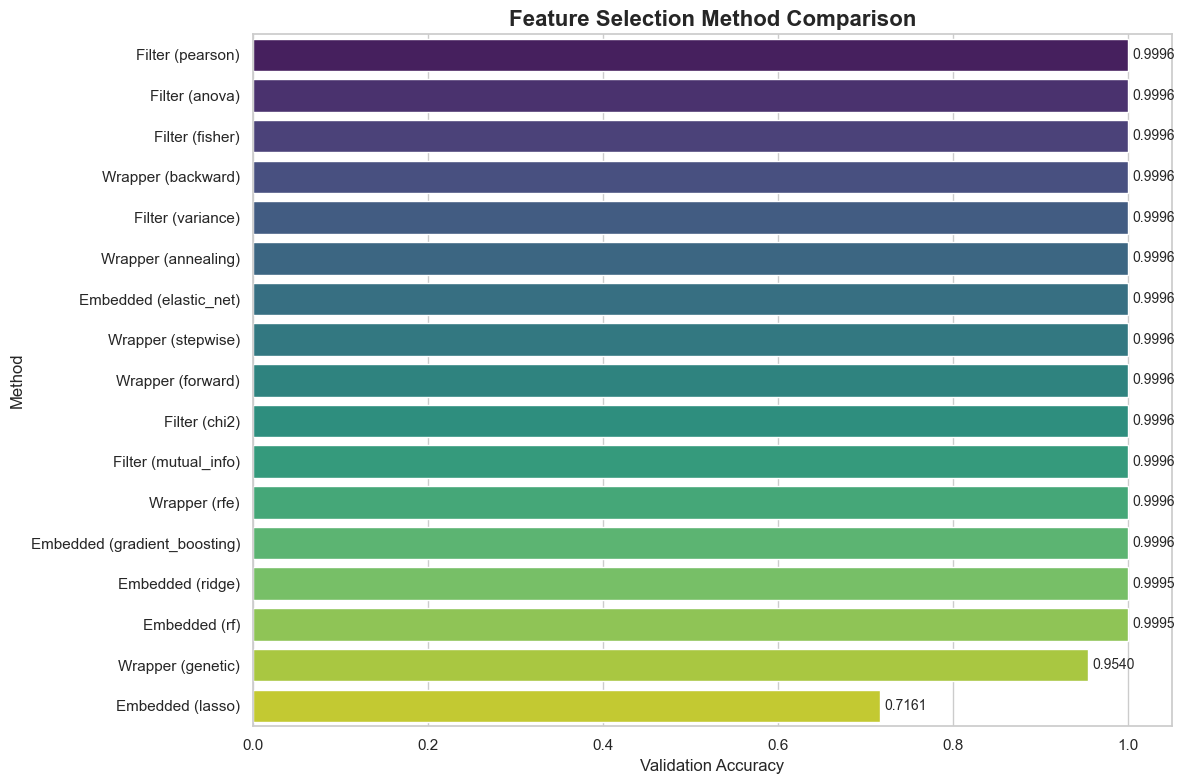


Starting Voting Feature Selection (Top 3 Methods)
Top 3 methods selected for voting:
  - Filter (pearson) (Accuracy: 0.9996)
  - Filter (anova) (Accuracy: 0.9996)
  - Filter (fisher) (Accuracy: 0.9996)

[Voting] Features selected by majority (2+ votes): ['Unnamed: 0', 'Dur', 'Proto', 'dDSb', 'sTtl', 'dTtl', 'Cause', 'TotPkts', 'SrcPkts', 'DstPkts', 'Offset', 'sMeanPktSz', 'dMeanPktSz', 'Loss', 'pLoss', 'State', 'SrcWin', 'TcpRtt', 'AckDat', 'DstLoss']
[Voting] Total features selected: 20


In [7]:
selected_features, comparison_results = perform_voting_feature_selection(
    X_train, y_train, X_val, y_val, 
    n_features=20, 
    sample_size=None, 
    top_k=3,
    file_path= preprocessing_output_dir,
    version=version
)

# LDA
# X_train, X_val, X_test = perform_lda_reduction(X_train, y_train, X_val, X_test)

# Autoencoder
# X_train, X_val, X_test = perform_autoencoder_reduction(
#     X_train, X_val, X_test, 
#     encoding_dim=20, 
#     epochs=20, 
#     device=device
# )

## Filter the dataframes to include only selected columns

In [8]:
# Overwrite your dataframes to keep ONLY the selected columns
X_train = X_train[selected_features]
X_val = X_val[selected_features]
X_test = X_test[selected_features]
preprocessing_args_list = [X_train, X_val, X_test, y_train, y_val, y_test, output_encoder, preprocessing_output_dir, version]

# Preprocessing

/Users/hemaali/Desktop/Master Degree Project/preprocess.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.09207346 -0.16725452 -1.32878274 ...  0.11563263  0.98318613
 -1.57742585]' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  X_train.iloc[:, :] = scaler.fit_transform(X_train)
/Users/hemaali/Desktop/Master Degree Project/preprocess.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.3877727   0.3877727   0.3877727  ...  0.3877727   0.3877727
 -0.62531769]' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  X_train.iloc[:, :] = scaler.fit_transform(X_train)
/Users/hemaali/Desktop/Master Degree Project/preprocess.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.53265367 -

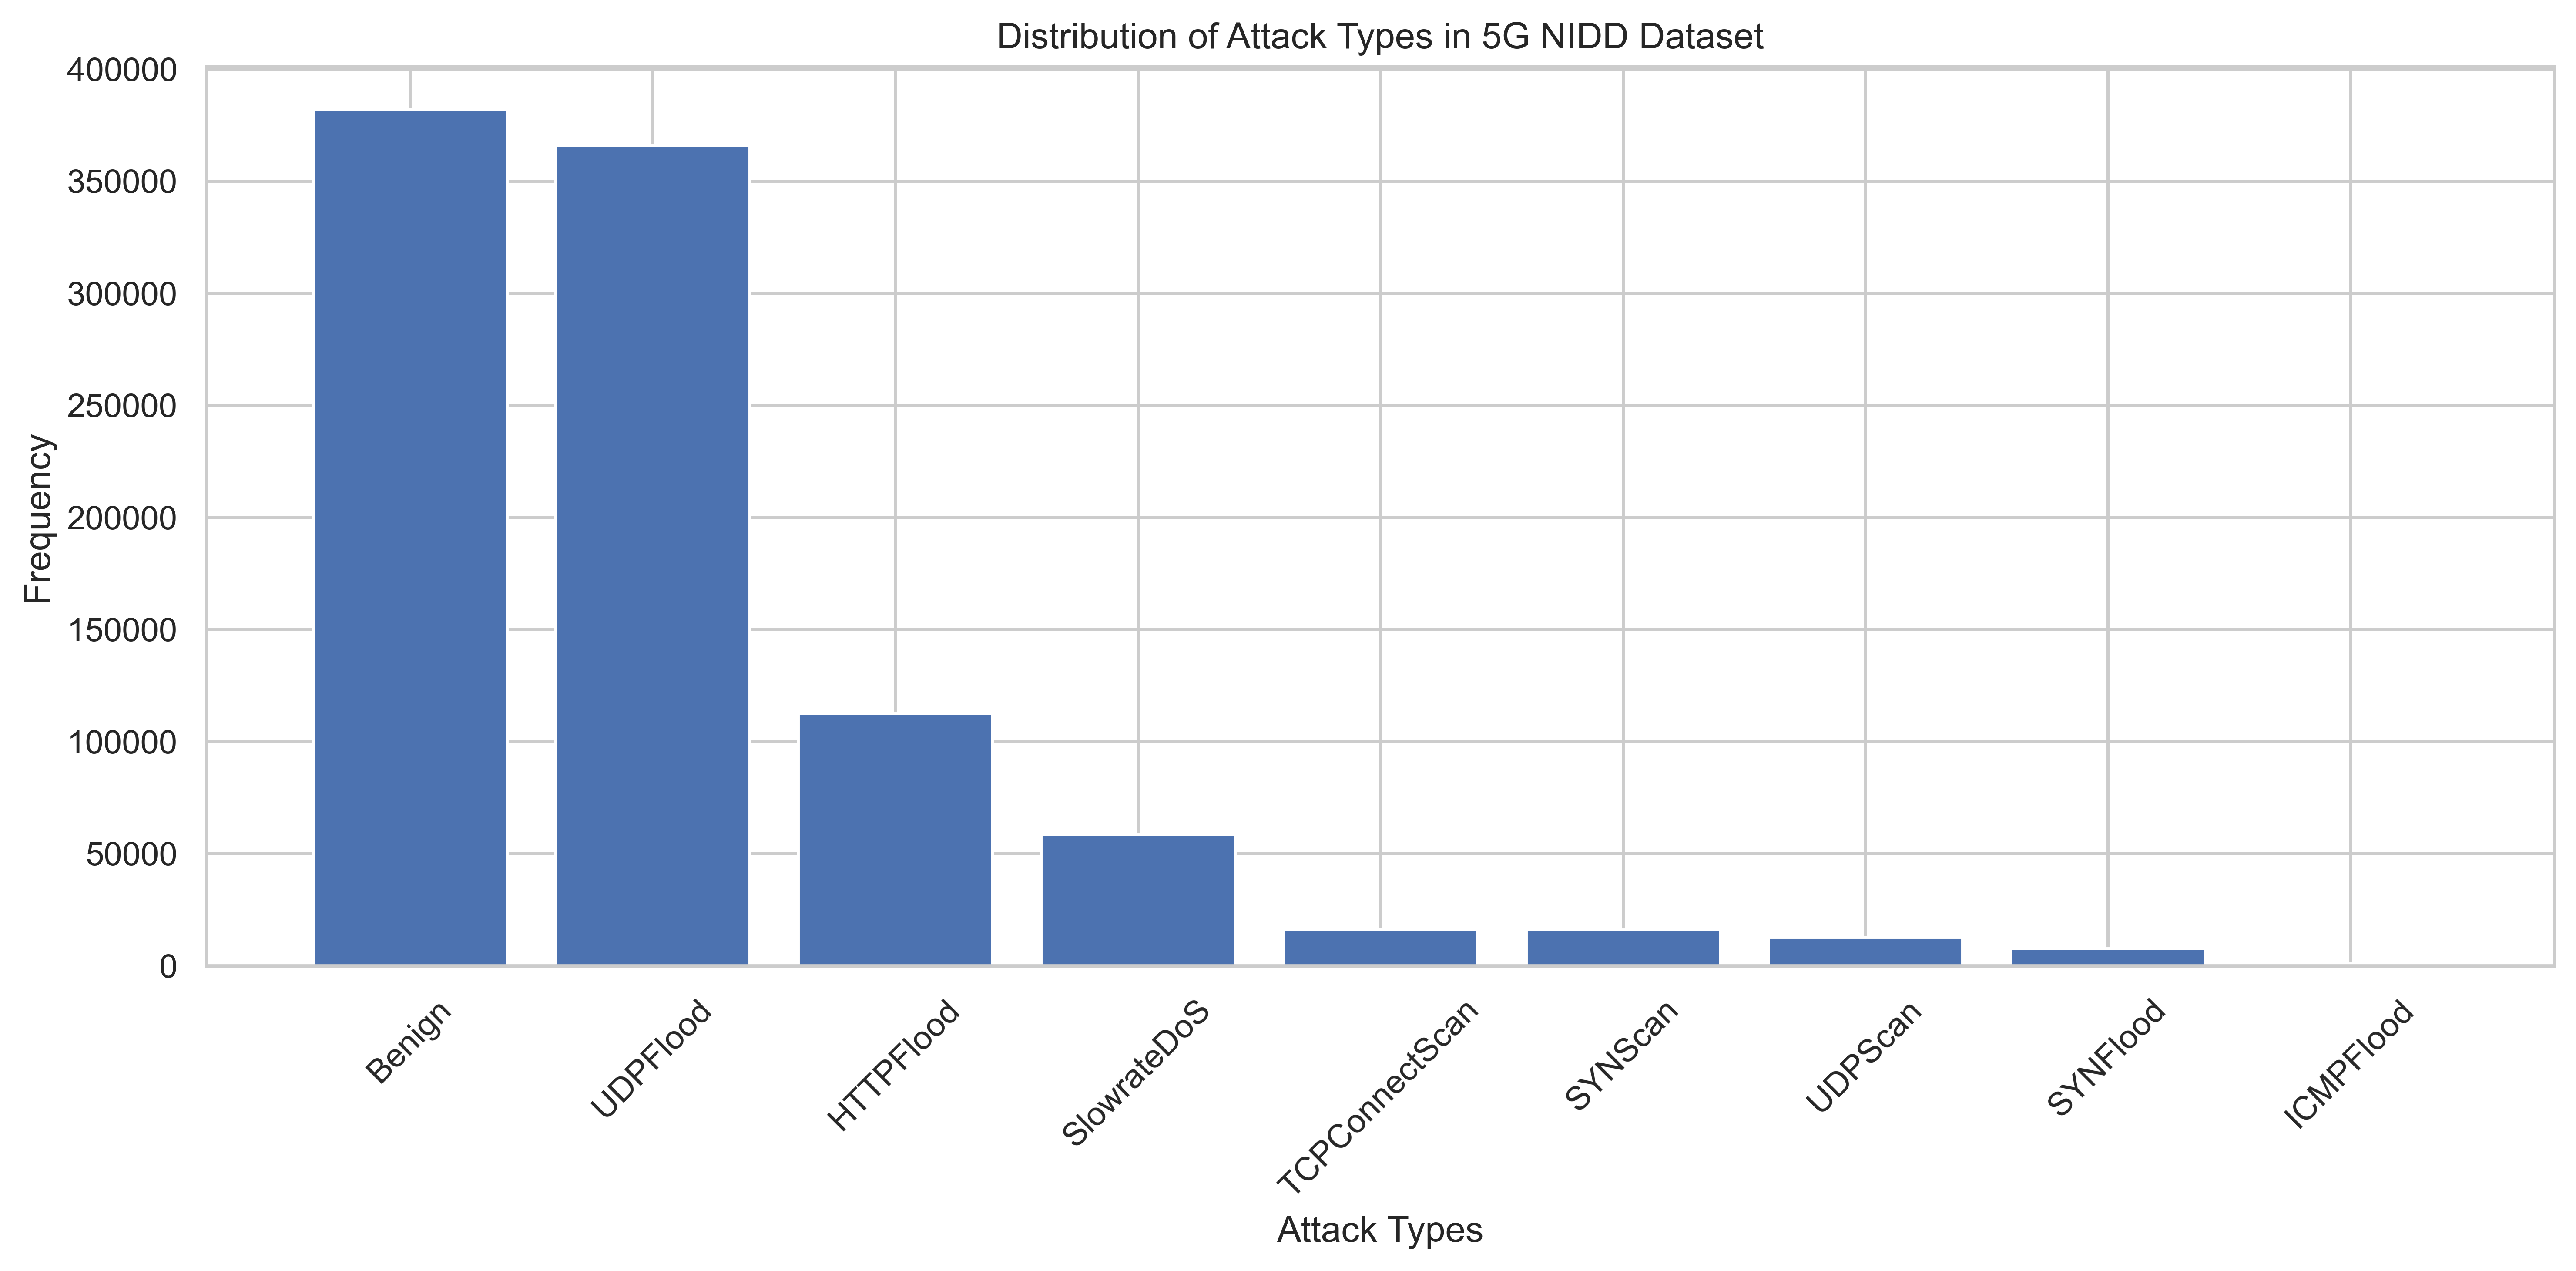

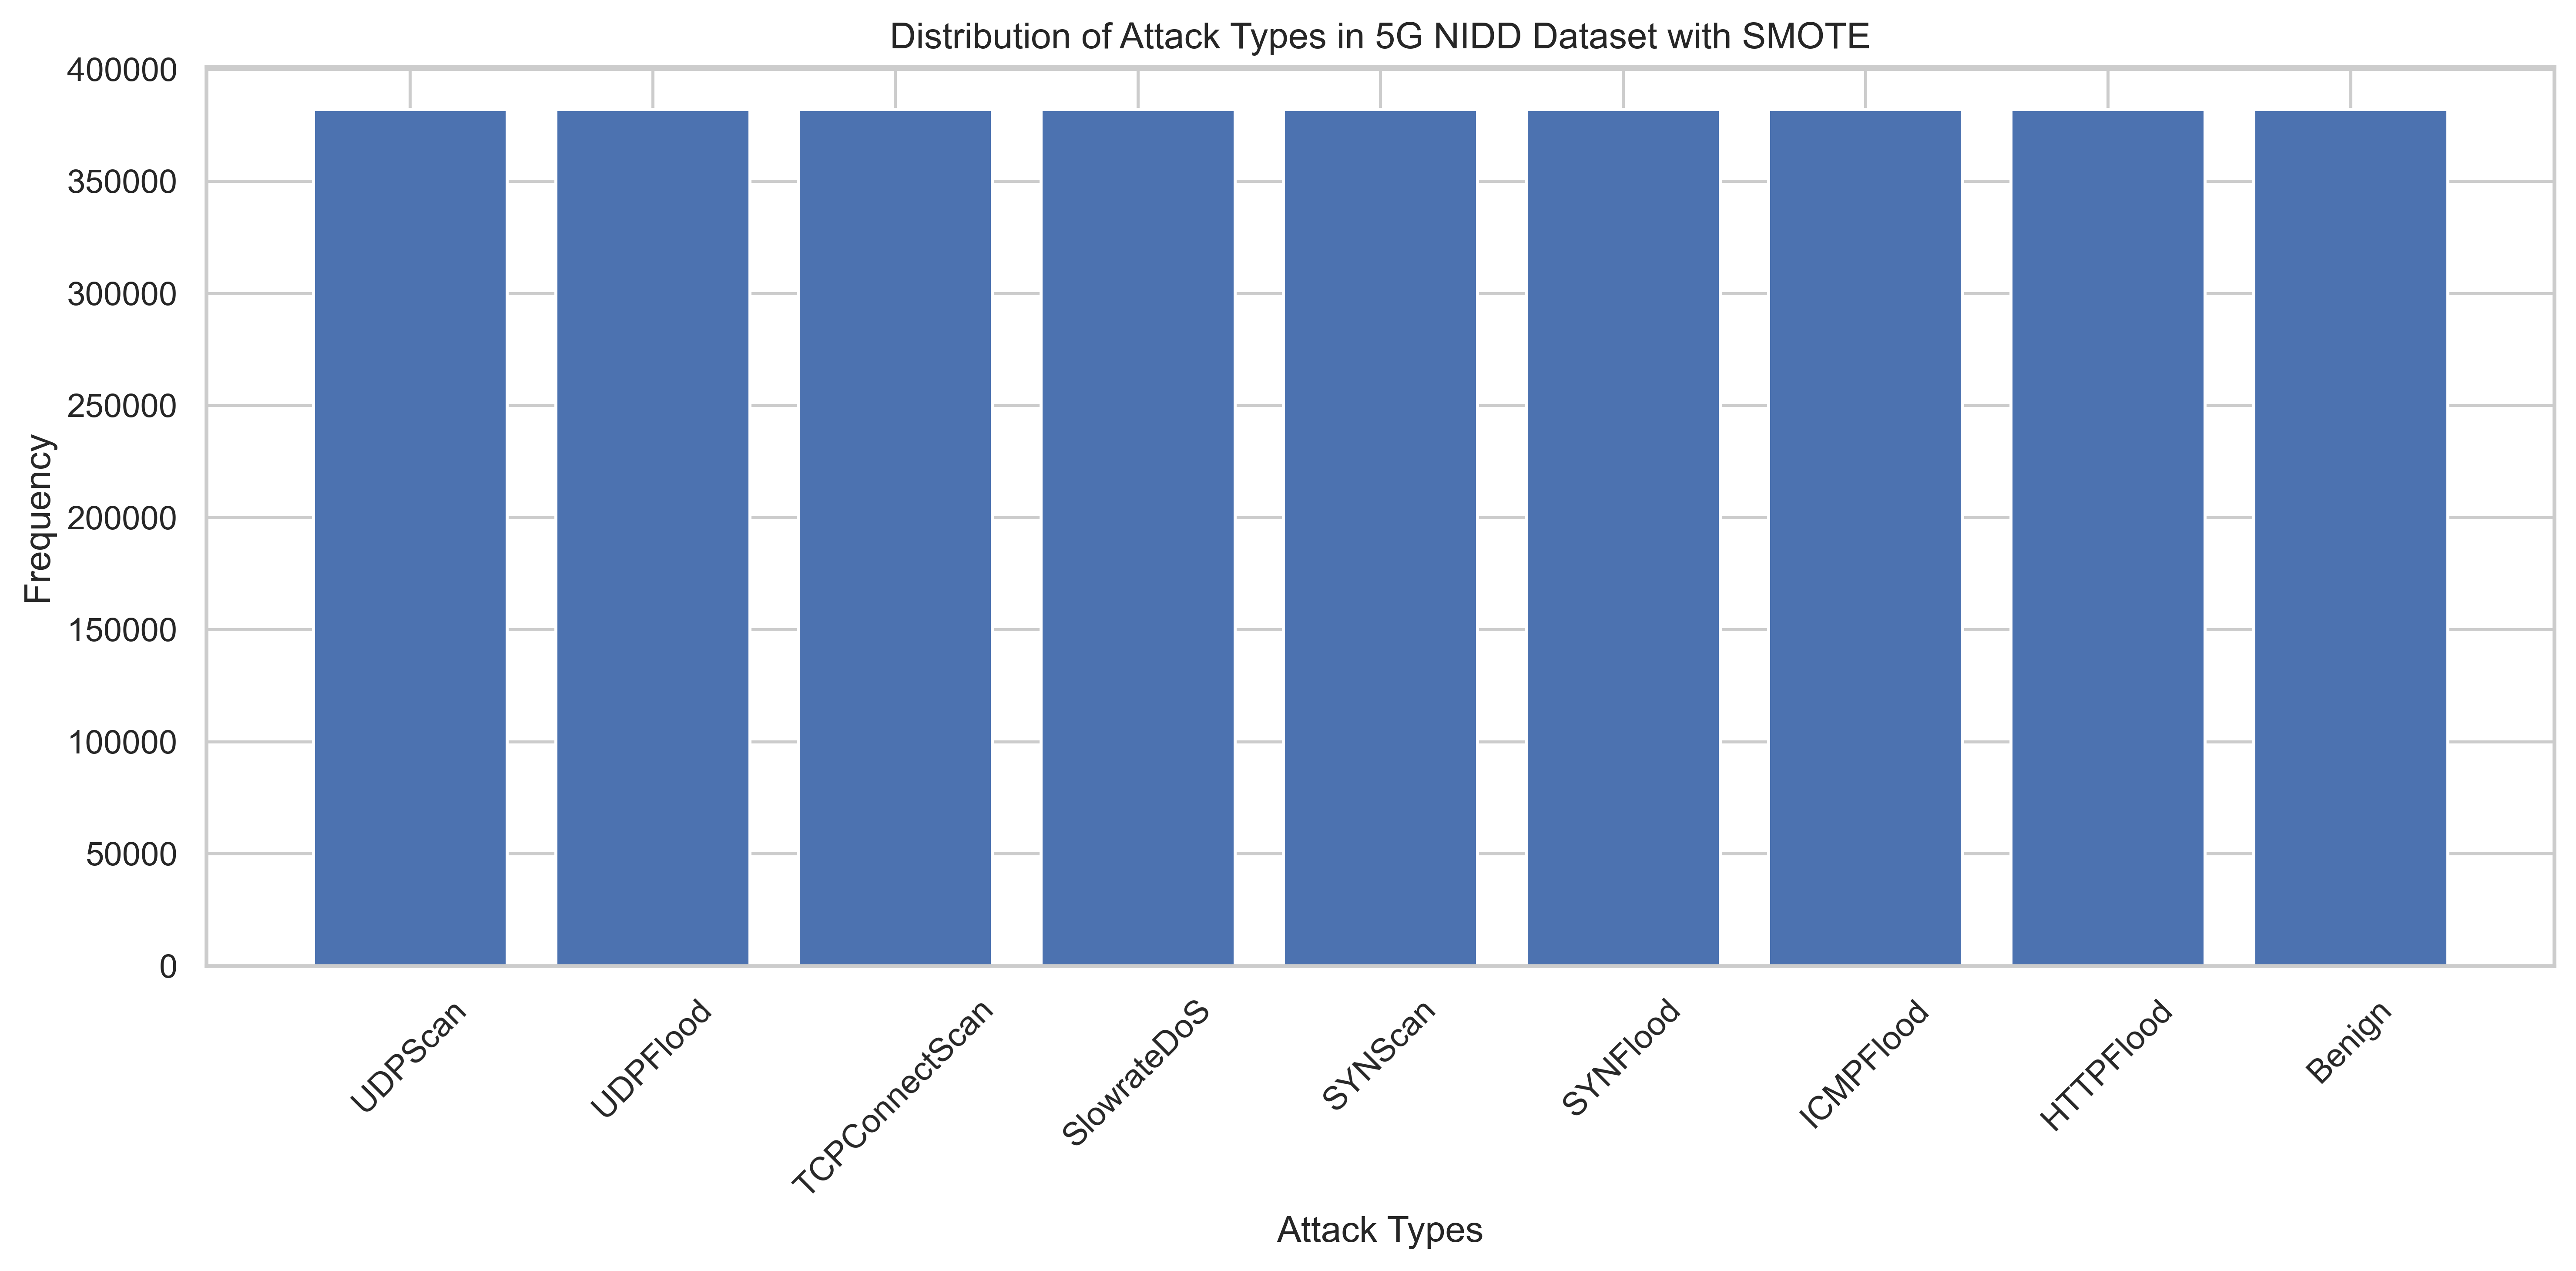

In [12]:
X_train_resampled, X_val, X_test, y_resampled, y_val, y_test = preprocessing(*preprocessing_args_list)

# Deep Learning

In [13]:
import torch
import torch.nn as nn

## Check for device

In [14]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


## Create DataLoaders (Shared for all DL models)

In [15]:
# Note: All models in this setup use the same input shape (N, 1, F)
train_loader, val_loader = create_dataloaders(X_train_resampled, y_resampled, X_val, y_val, batch_size=128)

## Define models

### LSTM

In [16]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
    def forward(self, x):
        out, _ = self.lstm(x)
        out = out[:, -1, :] 
        out = self.fc(out)
        return out

### GRU

In [17]:
class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(GRUModel, self).__init__()
        self.gru = nn.GRU(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
    def forward(self, x):
        out, _ = self.gru(x)
        out = out[:, -1, :]
        out = self.fc(out)
        return out

### CNN

In [18]:

class CNNModel(nn.Module):
    def __init__(self, input_length, num_classes):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=64, kernel_size=3)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool1d(kernel_size=2)
        self.flatten = nn.Flatten()
        conv_out_length = input_length - 2
        pool_out_length = conv_out_length // 2
        self.fc_input_dim = 64 * pool_out_length
        self.fc1 = nn.Linear(self.fc_input_dim, 128)
        self.fc2 = nn.Linear(128, num_classes)
    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

## Initializing and training the models

### Getting input size and number of classes

In [19]:
input_size = X_train_resampled.shape[1]
num_classes = len(np.unique(y_resampled))

### LSTM train and evaluate


--- LSTM Model ---


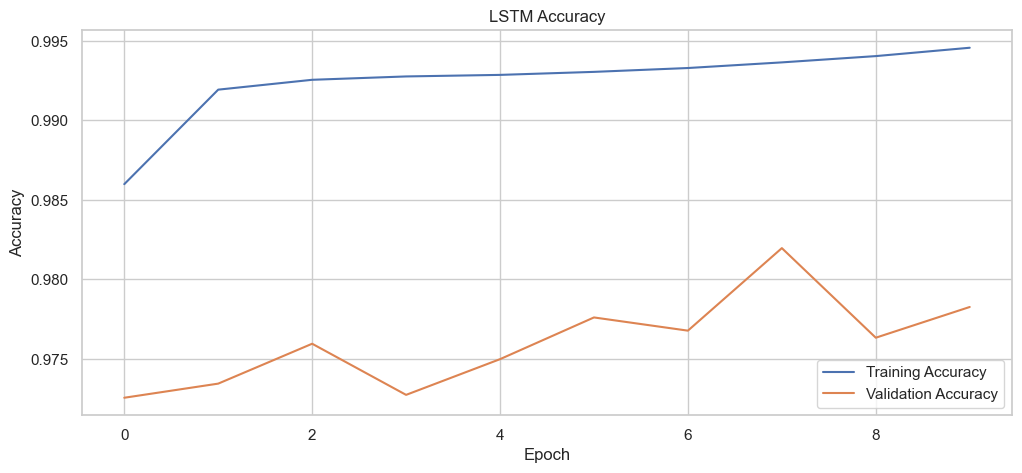

In [20]:
# --- LSTM ---
print("\n--- LSTM Model ---")
lstm_model = LSTMModel(input_size, 64, num_classes)
y_pred_lstm, t_time_lstm, p_time_lstm = train_and_evaluate_pytorch_model(
    lstm_model, train_loader, val_loader, num_epochs=10, device=device, model_name="LSTM"
)

LSTM Evaluation:
Accuracy: 0.9783
Precision: 0.9792
Recall: 0.9783
F1 Score: 0.9783
Training Time: 283.7516 seconds
Prediction Time: 0.4004 seconds
latency per sample: 0.000003 seconds

Classification Report: 
                precision    recall  f1-score   support

        Benign       1.00      0.95      0.97     47866
     HTTPFlood       1.00      1.00      1.00     14005
     ICMPFlood       1.00      1.00      1.00       104
      SYNFlood       1.00      1.00      1.00      1008
       SYNScan       1.00      1.00      1.00      2008
   SlowrateDoS       1.00      1.00      1.00      7188
TCPConnectScan       1.00      1.00      1.00      1972
      UDPFlood       0.95      1.00      0.97     45800
       UDPScan       1.00      1.00      1.00      1638

      accuracy                           0.98    121589
     macro avg       0.99      0.99      0.99    121589
  weighted avg       0.98      0.98      0.98    121589



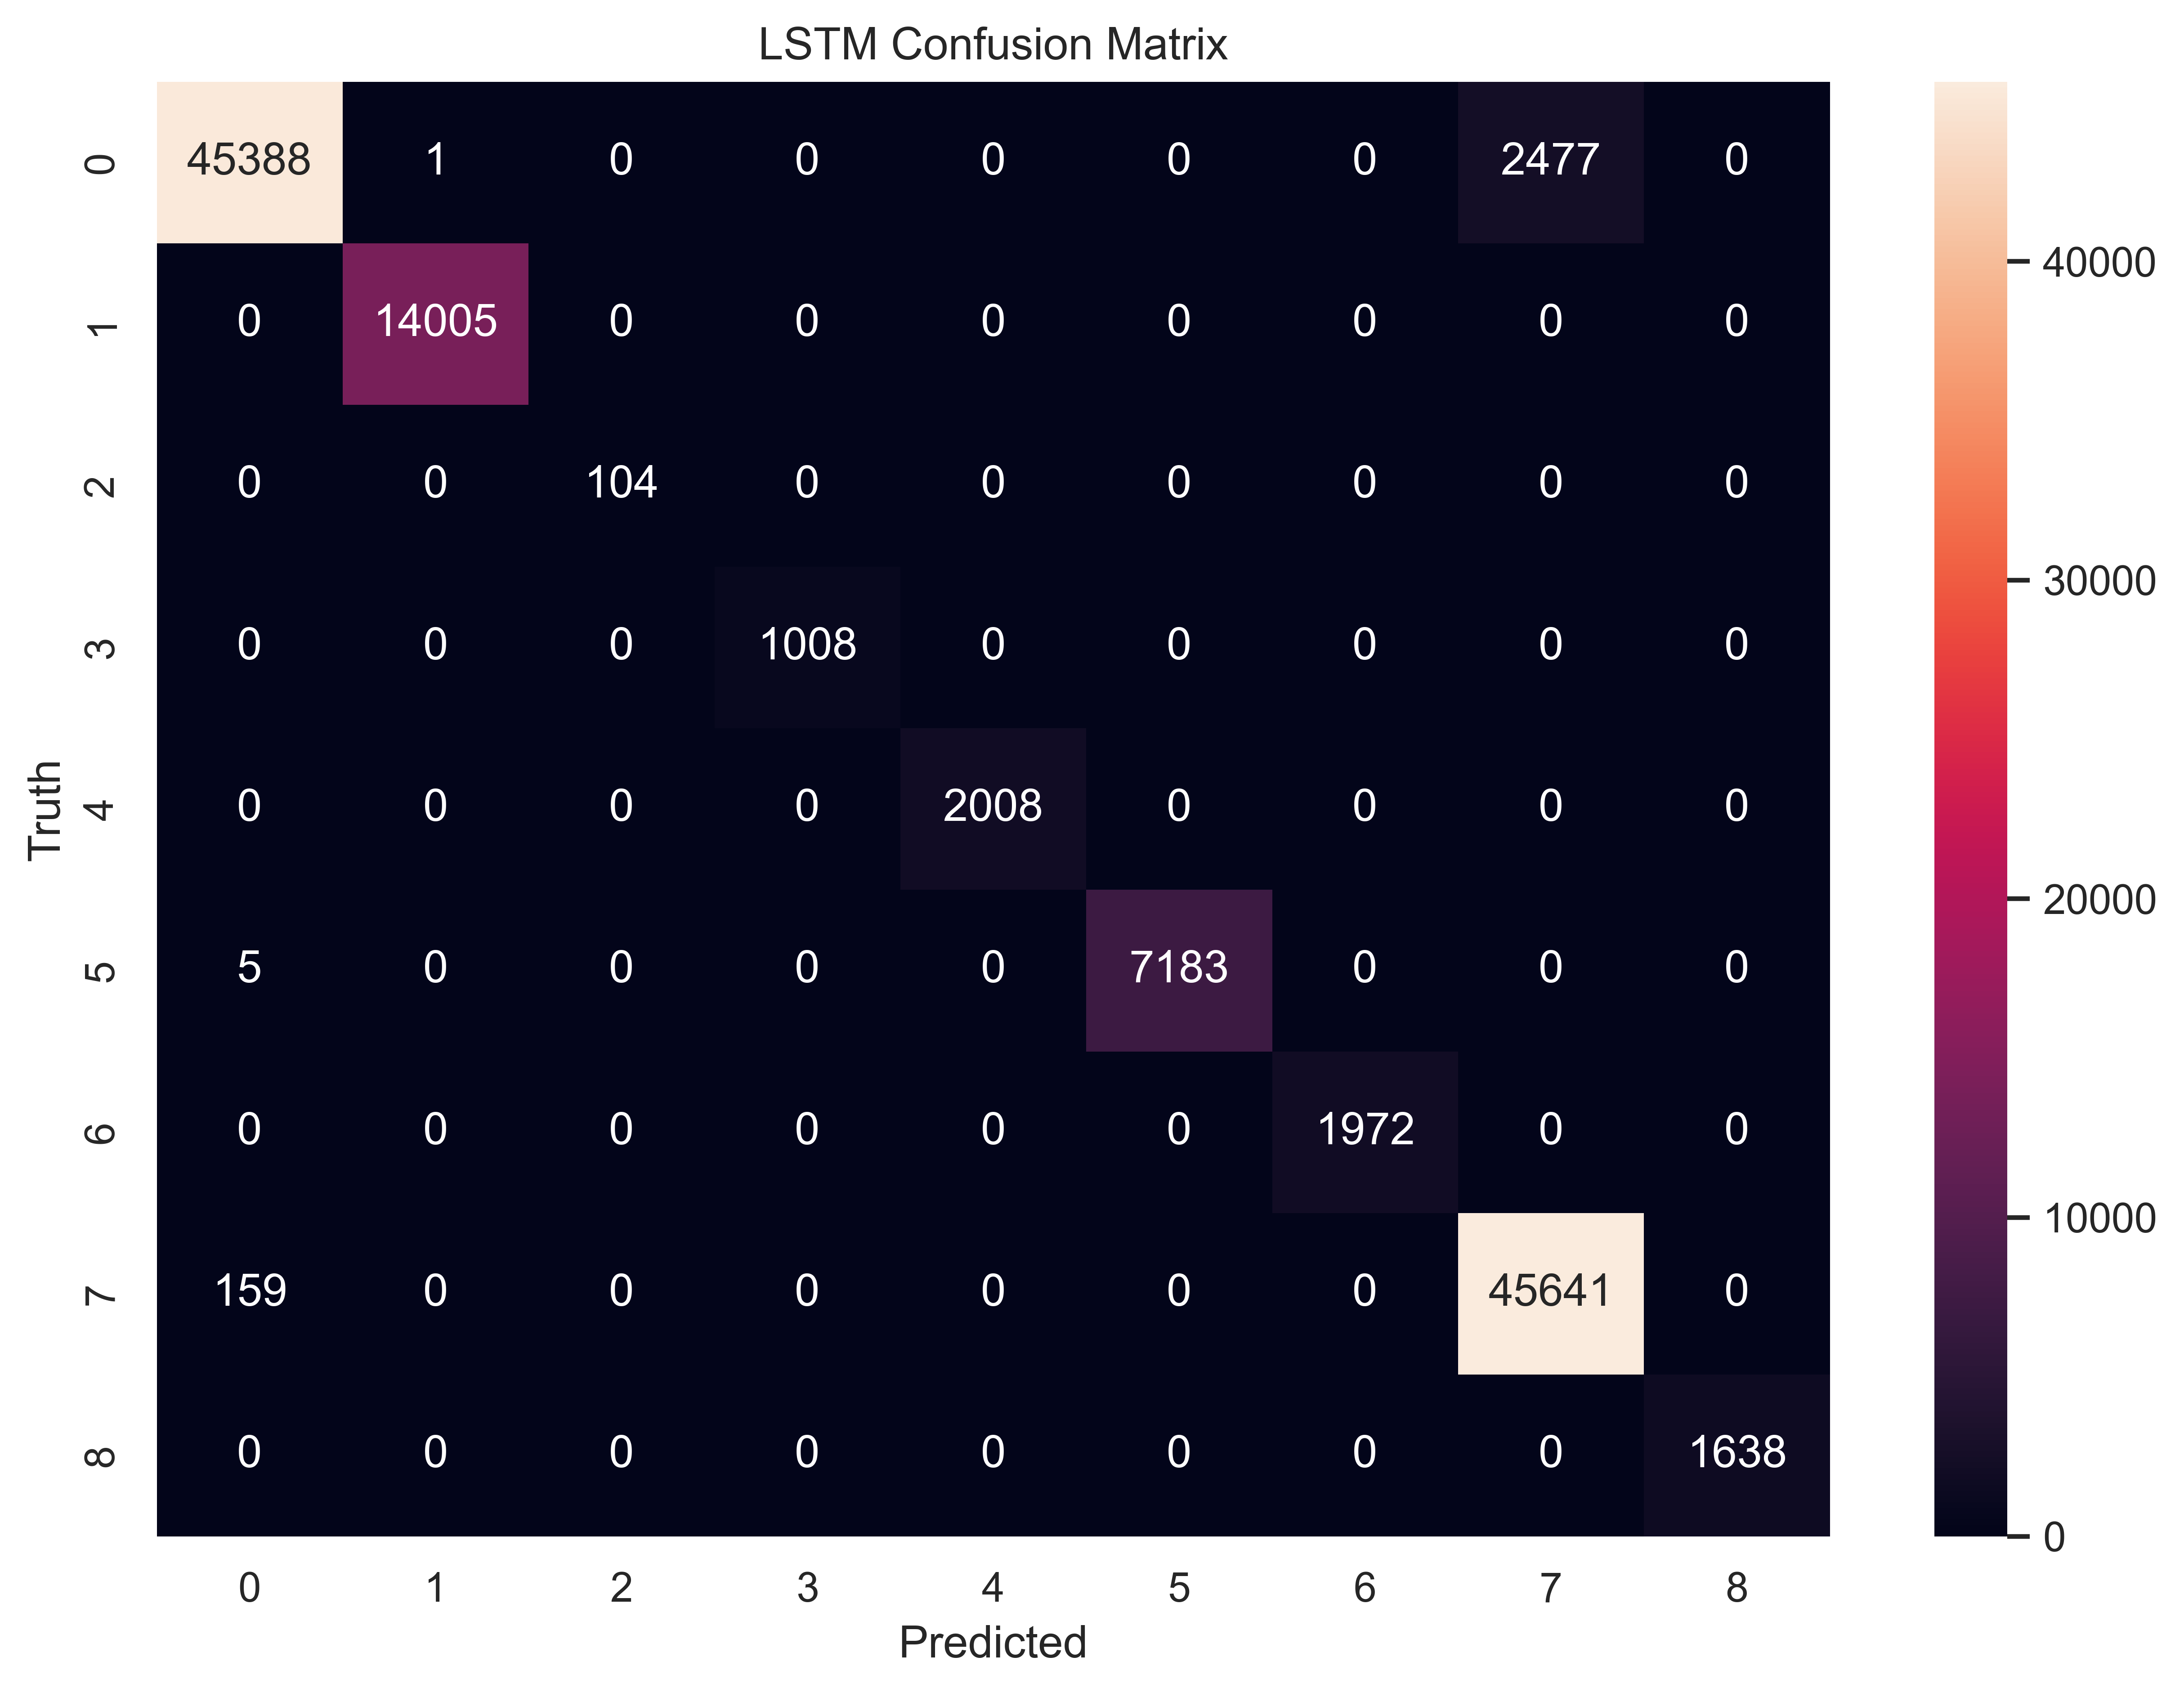

In [21]:
# arguments for evaluation function
eval_output_dir = os.path.join('data', 'figures', '5G NIDD', 'deep learning', 'models', 'lstm')
results_file_name = 'lstm_results.txt'
cm_title = 'LSTM Confusion Matrix'

print("LSTM Evaluation:")
accuracy, precision, recall, f1 = print_evaluation_metrics(y_val, y_pred_lstm, t_time_lstm, p_time_lstm, output_encoder, eval_output_dir, version, results_file_name, cm_title)
log_metrics('lstm', accuracy, precision, recall, f1, t_time_lstm, p_time_lstm)

### GRU train and evaluate


--- GRU Model ---


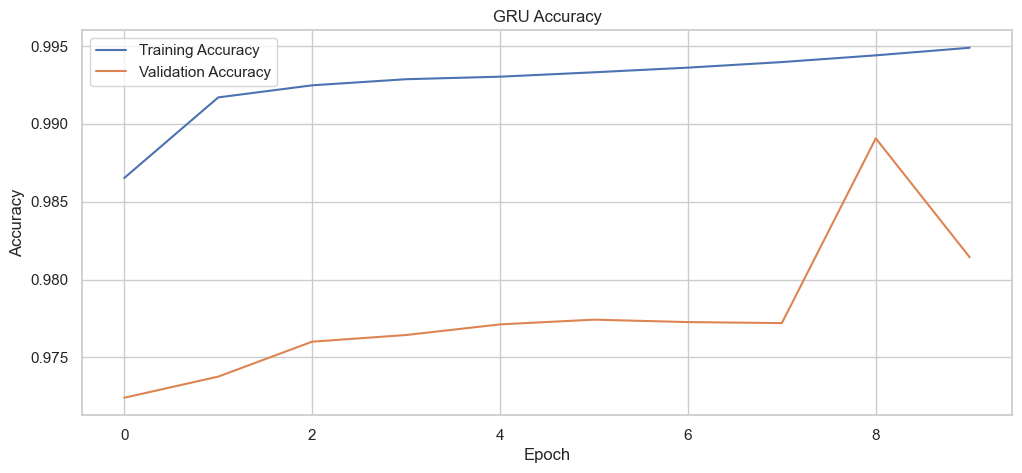

In [22]:
# --- GRU ---
print("\n--- GRU Model ---")
gru_model = GRUModel(input_size, 64, num_classes)
y_pred_gru, t_time_gru, p_time_gru = train_and_evaluate_pytorch_model(
    gru_model, train_loader, val_loader, num_epochs=10, device=device, model_name="GRU"
)

GRU Evaluation:
Accuracy: 0.9814
Precision: 0.9821
Recall: 0.9814
F1 Score: 0.9814
Training Time: 244.5996 seconds
Prediction Time: 0.3532 seconds
latency per sample: 0.000003 seconds

Classification Report: 
                precision    recall  f1-score   support

        Benign       1.00      0.96      0.98     47866
     HTTPFlood       1.00      1.00      1.00     14005
     ICMPFlood       1.00      1.00      1.00       104
      SYNFlood       1.00      1.00      1.00      1008
       SYNScan       1.00      1.00      1.00      2008
   SlowrateDoS       1.00      1.00      1.00      7188
TCPConnectScan       1.00      1.00      1.00      1972
      UDPFlood       0.96      1.00      0.98     45800
       UDPScan       1.00      1.00      1.00      1638

      accuracy                           0.98    121589
     macro avg       0.99      0.99      0.99    121589
  weighted avg       0.98      0.98      0.98    121589



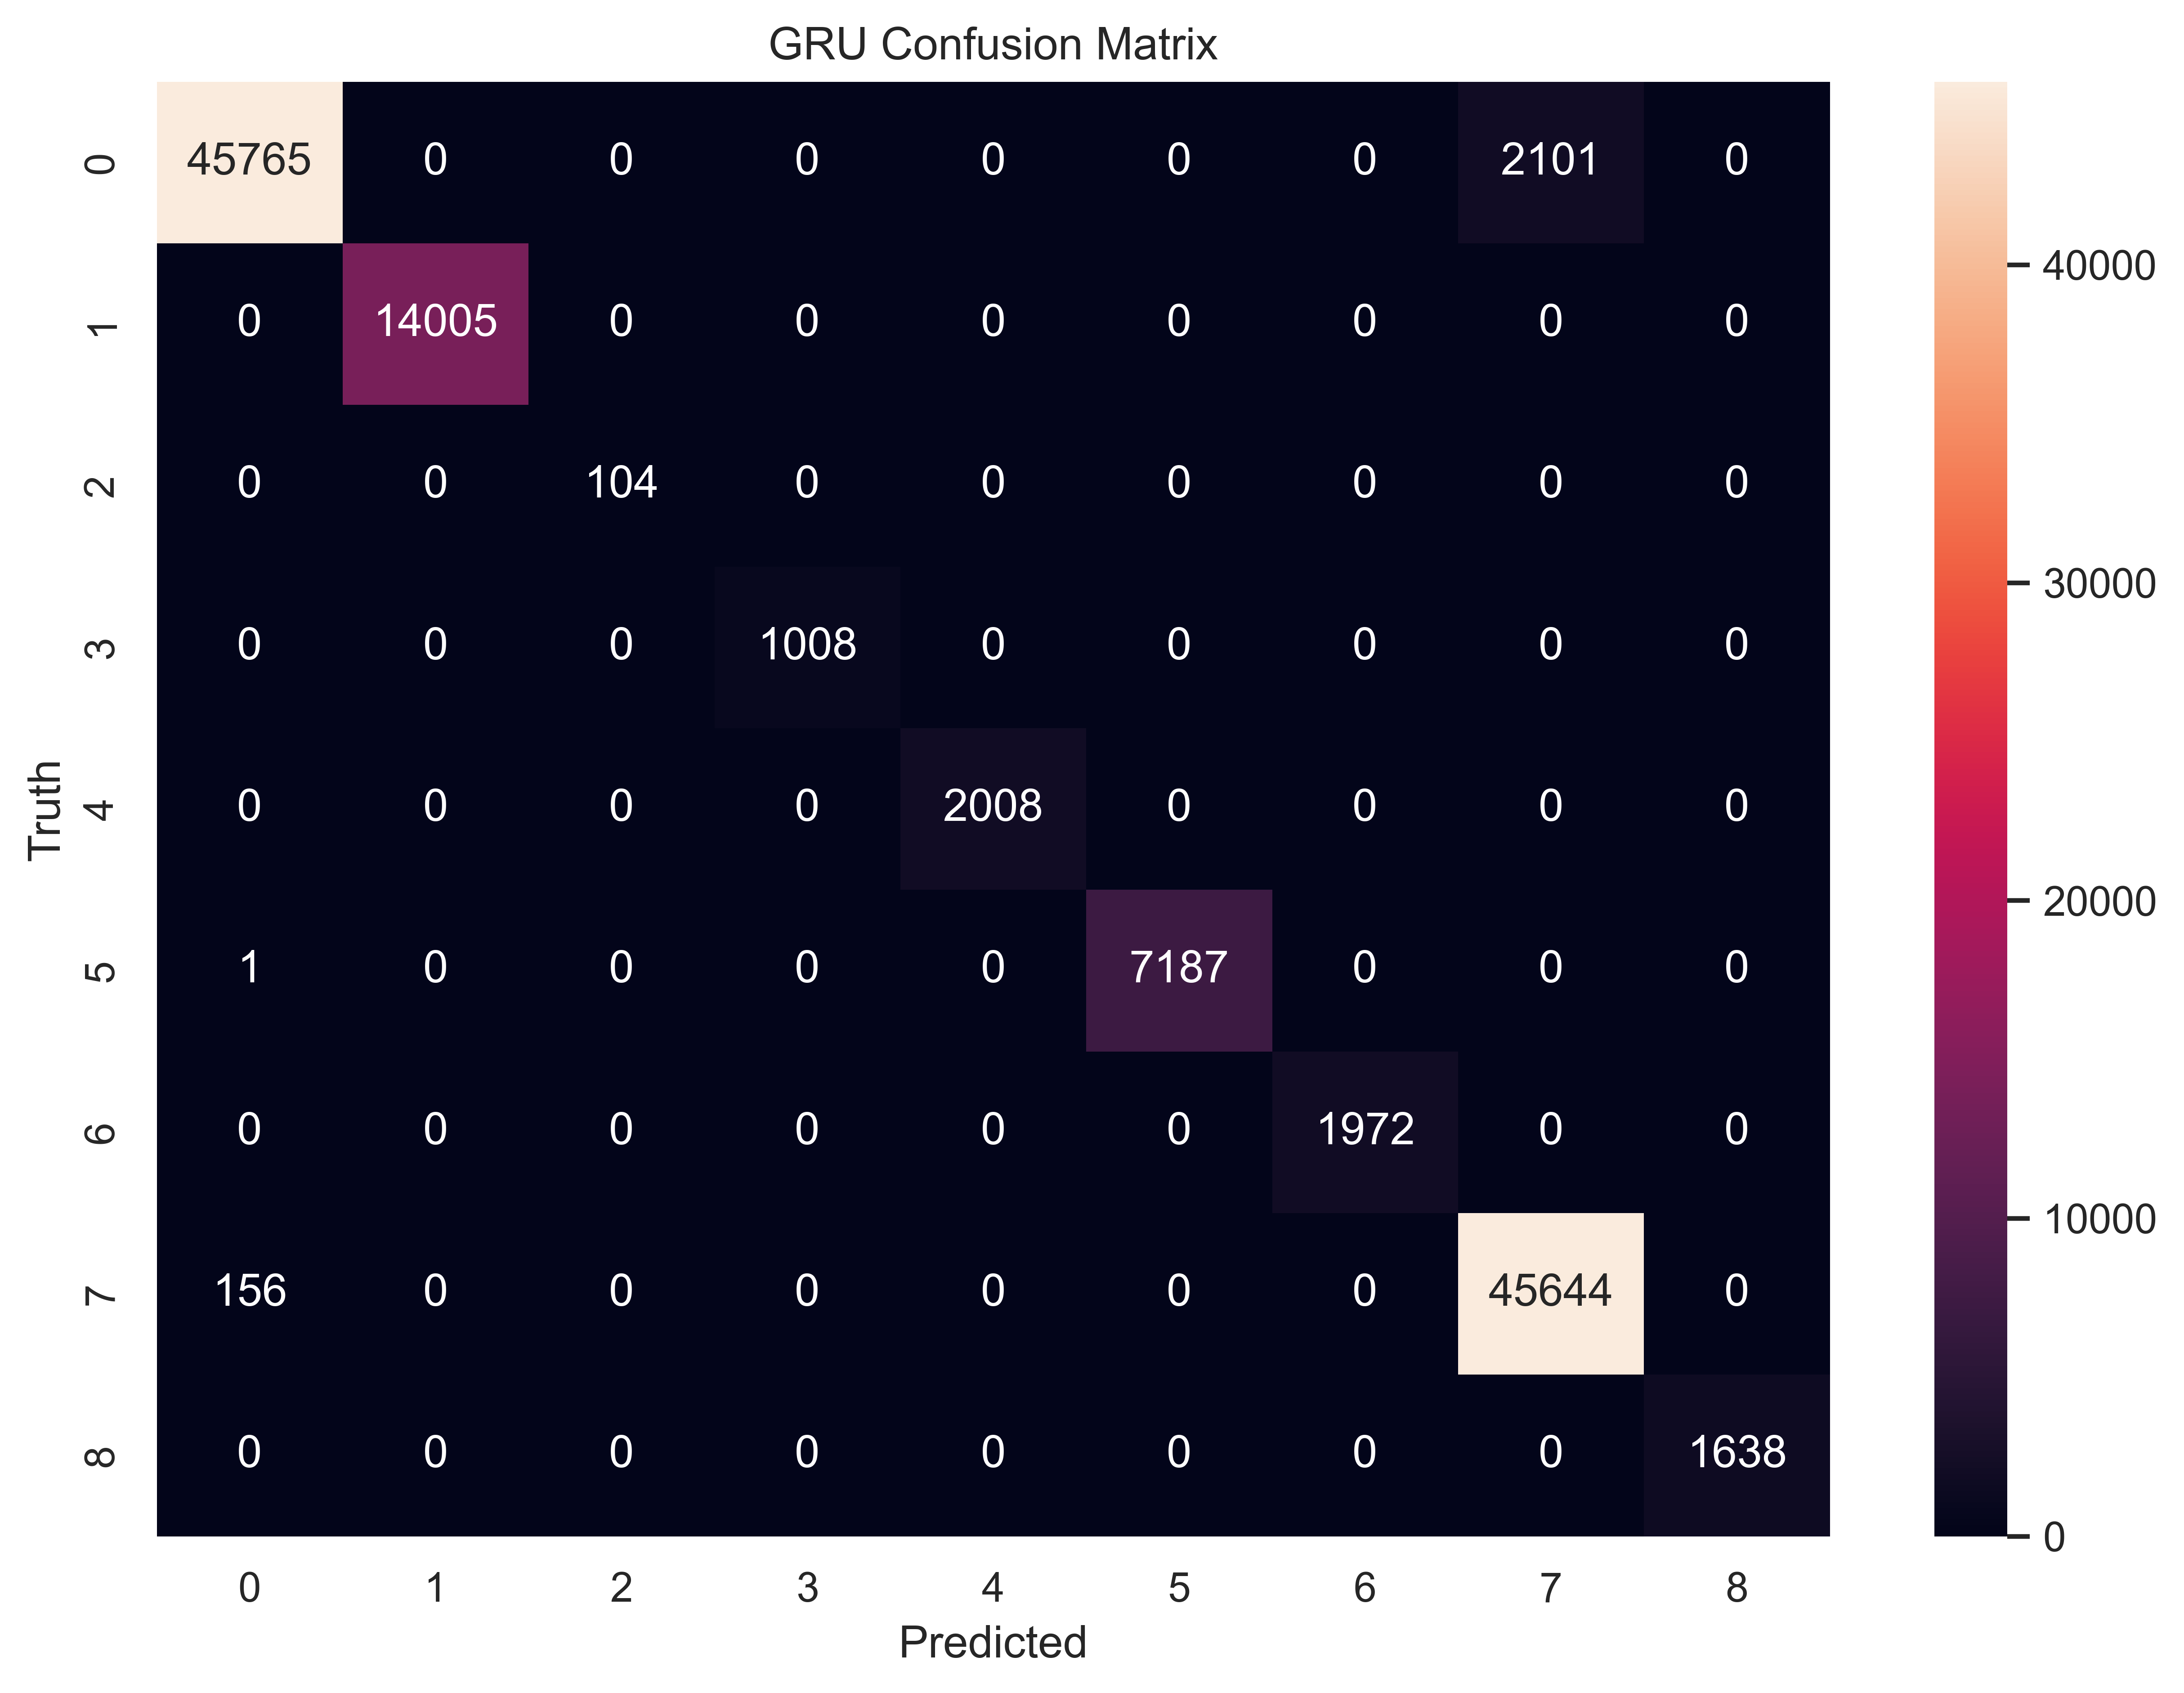

In [23]:
# arguments for evaluation function
eval_output_dir = os.path.join('data', 'figures', '5G NIDD', 'deep learning', 'models', 'gru')
results_file_name = 'gru_results.txt'
cm_title = 'GRU Confusion Matrix'

print("GRU Evaluation:")
accuracy, precision, recall, f1 = print_evaluation_metrics(y_val, y_pred_gru, t_time_gru, p_time_gru, output_encoder, eval_output_dir, version, results_file_name, cm_title)
log_metrics('gru', accuracy, precision, recall, f1, t_time_gru, p_time_gru)

### CNN train and evaluate


--- CNN Model ---


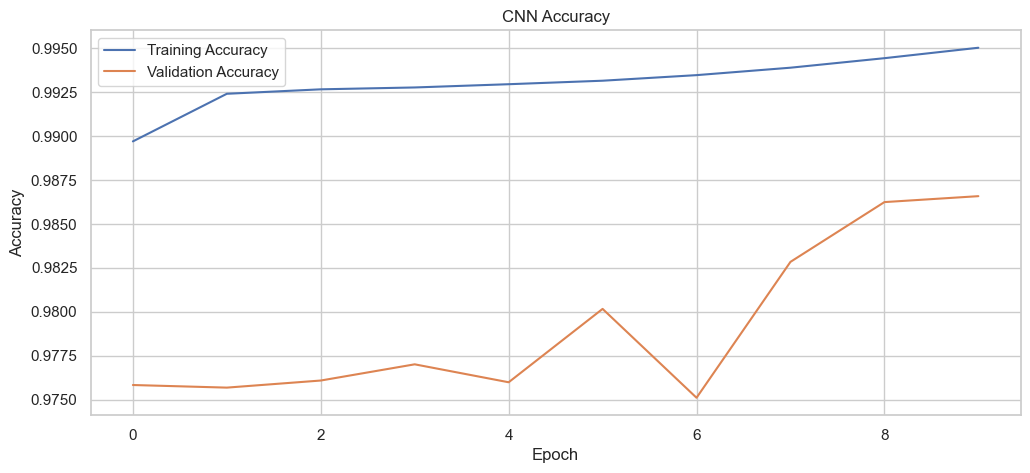

In [24]:
# --- CNN ---
print("\n--- CNN Model ---")
cnn_model = CNNModel(input_size, num_classes)
y_pred_cnn, t_time_cnn, p_time_cnn = train_and_evaluate_pytorch_model(
    cnn_model, train_loader, val_loader, num_epochs=10, device=device, model_name="CNN"
)

Logistic Regression Evaluation:
Accuracy: 0.9866
Precision: 0.9866
Recall: 0.9866
F1 Score: 0.9866
Training Time: 1822.3176 seconds
Prediction Time: 1.4637 seconds
latency per sample: 0.000012 seconds

Classification Report: 
                precision    recall  f1-score   support

        Benign       0.99      0.98      0.98     47866
     HTTPFlood       1.00      1.00      1.00     14005
     ICMPFlood       1.00      1.00      1.00       104
      SYNFlood       1.00      1.00      1.00      1008
       SYNScan       1.00      1.00      1.00      2008
   SlowrateDoS       1.00      1.00      1.00      7188
TCPConnectScan       1.00      1.00      1.00      1972
      UDPFlood       0.98      0.99      0.98     45800
       UDPScan       1.00      1.00      1.00      1638

      accuracy                           0.99    121589
     macro avg       1.00      1.00      1.00    121589
  weighted avg       0.99      0.99      0.99    121589



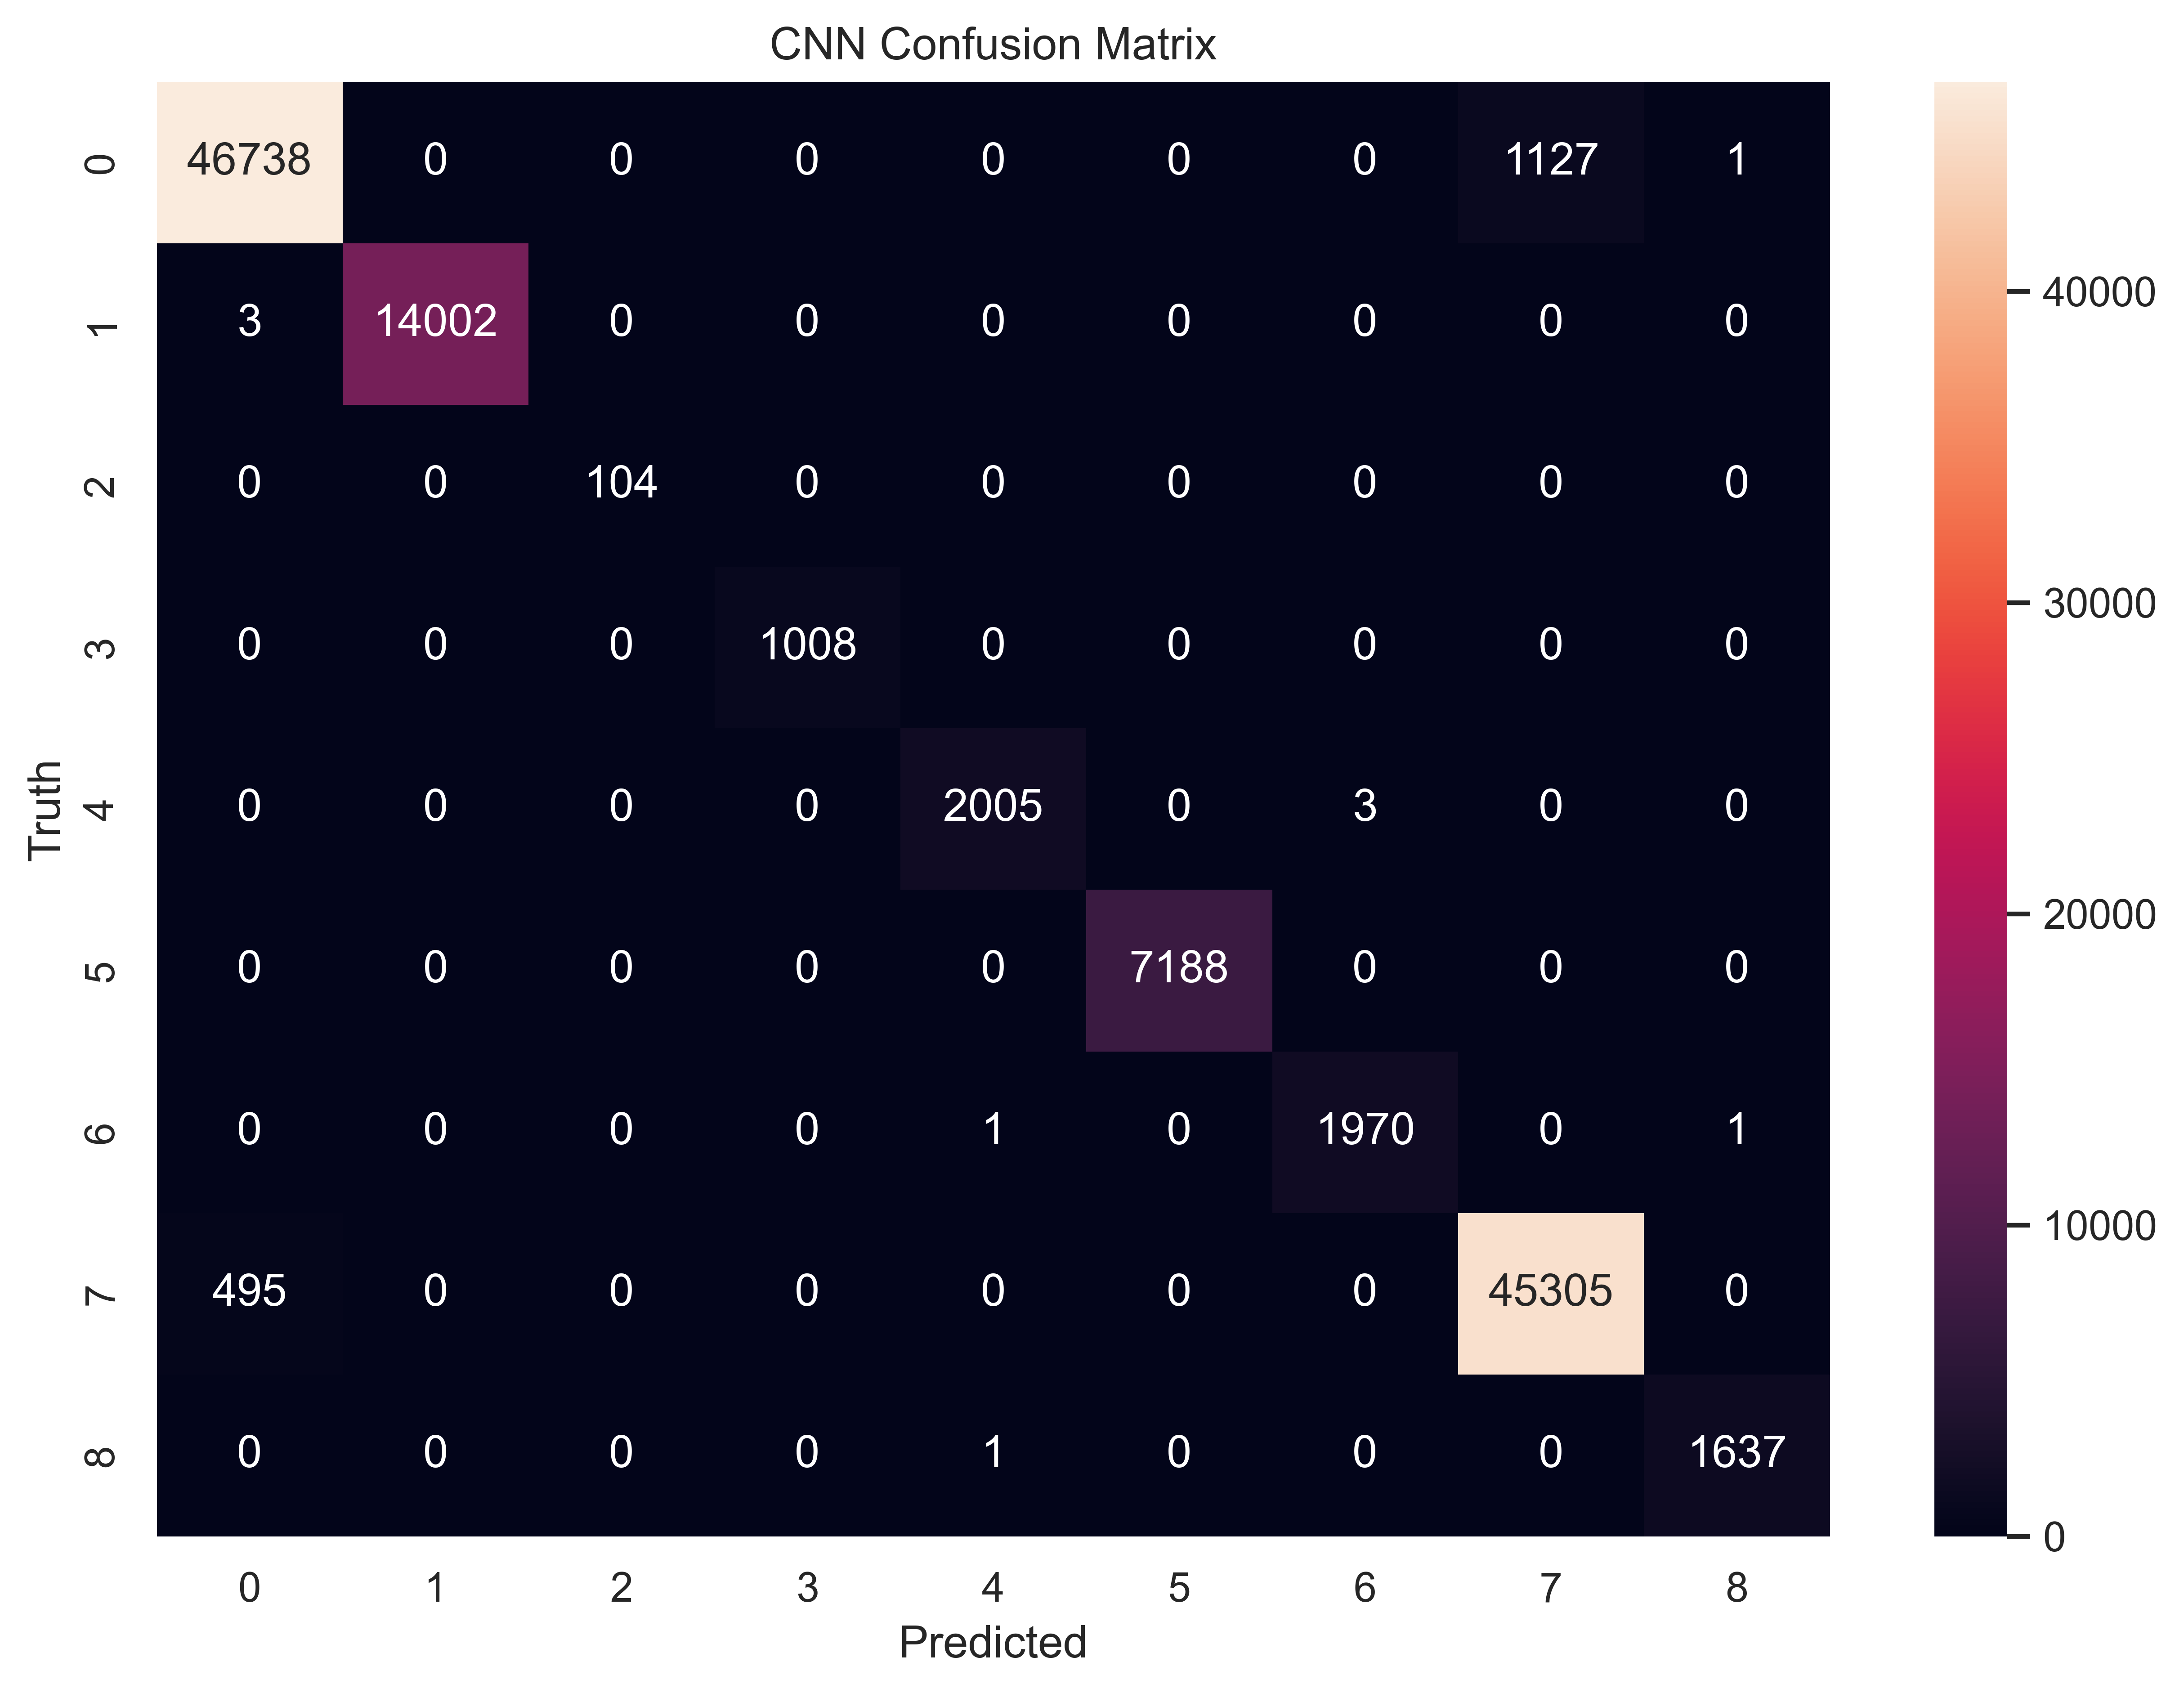

In [25]:
# arguments for evaluation function
eval_output_dir = os.path.join('data', 'figures', '5G NIDD', 'deep learning', 'models', 'cnn')
results_file_name = 'cnn_results.txt'
cm_title = 'CNN Confusion Matrix'

print("Logistic Regression Evaluation:")
accuracy, precision, recall, f1 = print_evaluation_metrics(y_val, y_pred_cnn, t_time_cnn, p_time_cnn, output_encoder, eval_output_dir, version, results_file_name, cm_title)
log_metrics('cnn', accuracy, precision, recall, f1, t_time_cnn, p_time_cnn)

# Bar charts

In [2]:
deep_learning_output_dir = os.path.join('data', 'figures', '5G NIDD', 'deep learning', 'bar charts')
plot_individual_metrics(model_results, deep_learning_output_dir, version)

NameError: name 'model_results' is not defined